In [ ]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.interpolate 
import csv
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'


# Relaxation Time

In [ ]:
tripl=[]

with open('gamma_inverse_logms_QMCRMF3.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        tripl.append([float(row[0]),float(row[1]),float(row[2])])
x, y, z = zip(*tripl)
z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):30j, min(y):max(y):30j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

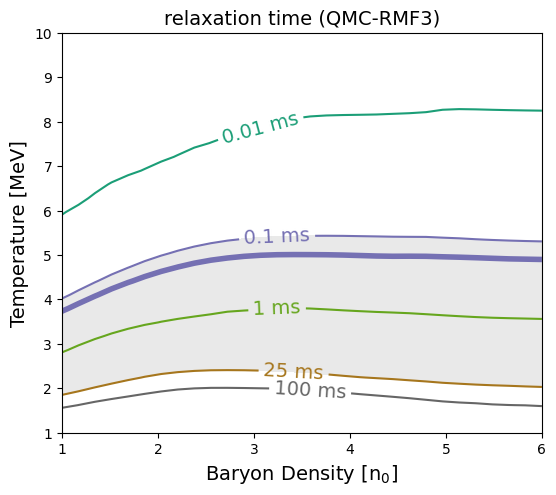

In [ ]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([-2, -1, 0, 1.39794, 2]), cmap='Dark2', linewidths=[1.5, 1.5, 1.5, 1.5, 1.5])
fill=plt.contourf(grid_x,grid_y,grid_z,10,levels=np.array([-1, 1.39794]),cmap='Greys', alpha=0.2)
fmt = {}
strs = ['0.01 ms','0.1 ms', '1 ms', '25 ms', '100 ms'] #'$\leq$ \geq$'
for l, s in zip(contours.levels, strs):
    fmt[l] = s
plt.clabel(contours, contours.levels[::1],inline=1,fmt=fmt, fontsize=14)
contours2 = plt.contour(grid_x, grid_y, grid_z, levels=np.array([-0.797978]), linewidths=[4],colors=[(0.4588235294117647, 0.4392156862745098, 0.7019607843137254)], linestyles="solid")
ax.set_title('relaxation time (QMC-RMF3)',fontsize=14)
ax.set_ylabel('Temperature [MeV]',fontsize=14)
ax.set_xlabel('Baryon Density [n$_0$]',fontsize=14)
plt.savefig("gamma_inverse_logms_QMCRMF3.pdf")
plt.show()

In [ ]:
tripl=[]

with open('gamma_inverse_logms_IUF.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        tripl.append([float(row[0]),float(row[1]),float(row[2])])
x, y, z = zip(*tripl)
z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):30j, min(y):max(y):30j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

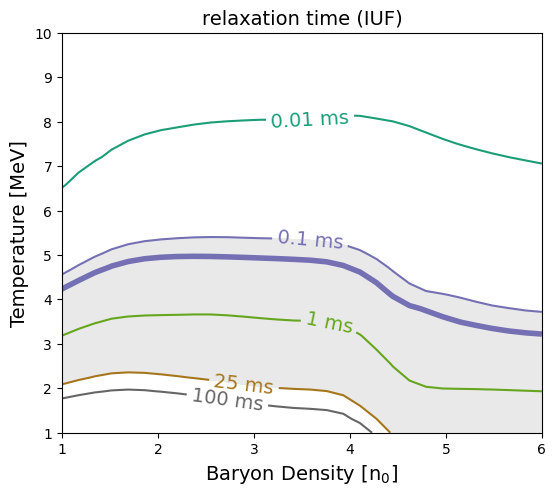

In [ ]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([-2, -1, 0, 1.39794, 2]), cmap='Dark2', linewidths=[1.5, 1.5, 1.5, 1.5, 1.5])
fill=plt.contourf(grid_x,grid_y,grid_z,10,levels=np.array([-1, 1.39794]),cmap='Greys', alpha=0.2)
fmt = {}
strs = ['0.01 ms','0.1 ms', '1 ms', '25 ms', '100 ms'] #'$\leq$ \geq$'
for l, s in zip(contours.levels, strs):
    fmt[l] = s
plt.clabel(contours, contours.levels[::1],inline=1,fmt=fmt, fontsize=14)
contours2 = plt.contour(grid_x, grid_y, grid_z, levels=np.array([-0.797978]), linewidths=[4],colors=[(0.4588235294117647, 0.4392156862745098, 0.7019607843137254)], linestyles="solid")
ax.set_title('relaxation time (IUF)',fontsize=14)
ax.set_ylabel('Temperature [MeV]',fontsize=14)
ax.set_xlabel('Baryon Density [n$_0$]',fontsize=14)
plt.savefig("gamma_inverse_logms_IUF.pdf")
plt.show()

# Damping Time of a 1 kHz Oscillation

In [ ]:
tripl=[]

with open('damping_logsec_IUF.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        tripl.append([float(row[0]),float(row[1]),float(row[2])])
x, y, z = zip(*tripl)
z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):60j, min(y):max(y):60j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

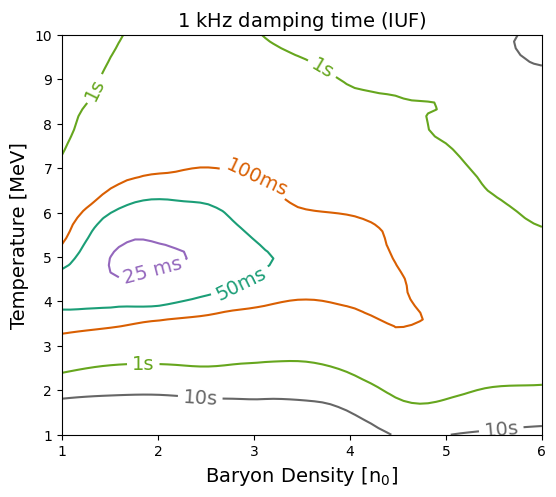

In [ ]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([-1.60206, -1.30103, -1, 0, 1]), cmap='Dark2', linewidths=[0, 1.5, 1.5, 1.5, 1.5])#nipy_spectral_r
#fill=plt.contourf(grid_x,grid_y,grid_z,10,levels=np.array([1,50]),cmap='Greys', alpha=0.2)
fmt = {}
strs = ['','50ms', '100ms', '1s','10s']
for l, s in zip(contours.levels, strs):
    fmt[l] = s
plt.clabel(contours, contours.levels[::1],inline=1,fmt=fmt, fontsize=14)
#ax.clabel(contours, inline=True,     fontsize=12)
max_idx = np.unravel_index(np.argmax(grid_z, axis=None), grid_z.shape)# Find the indices of the maximum value
#ax.scatter(grid_x[max_idx], grid_y[max_idx], marker='o', s=50, color='red') # Plot a point at the maximum value location
contours2 = plt.contour(grid_x, grid_y, grid_z, levels=np.array([-1.60206]),colors='tab:purple',linestyles='solid')
plt.clabel(contours2, inline=1,fmt='25 ms', fontsize=14,manual=[(1.9,5)],colors='tab:purple')
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
ax.set_title('$1$ kHz damping time (IUF)',fontsize=14)
ax.set_ylabel('Temperature [MeV]',fontsize=14)
ax.set_xlabel('Baryon Density [n$_0$]',fontsize=14)
plt.savefig("damping_logsec_IUF.pdf")
plt.show()

In [ ]:
tripl=[]

with open('damping_logsec_QMCRMF3.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        tripl.append([float(row[0]),float(row[1]),float(row[2])])
x, y, z = zip(*tripl)
z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):60j, min(y):max(y):60j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

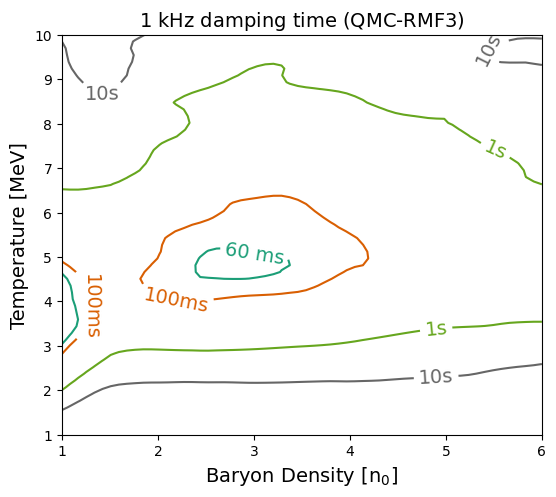

In [ ]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([-1.60206, -1.30103, -1, 0, 1]), cmap='Dark2',linewidths=[1.5, 0,1.5, 1.5, 1.5])
#fill=plt.contourf(grid_x,grid_y,grid_z,10,levels=np.array([1,50]),cmap='Greys', alpha=0.2)
fmt = {}
strs = ['25ms','50ms', '100ms', '1s','10s']
for l, s in zip(contours.levels, strs):
    fmt[l] = s
plt.clabel(contours, contours.levels[::1],inline=1,fmt=fmt, fontsize=14)
#ax.clabel(contours, inline=True,     fontsize=12)
max_idx = np.unravel_index(np.argmax(grid_z, axis=None), grid_z.shape)# Find the indices of the maximum value
contours2 = plt.contour(grid_x, grid_y, grid_z, levels=np.array([-1.22185]), cmap='Dark2')
plt.clabel(contours2,inline=1,fmt='60 ms', fontsize=14,manual=[(3,5)])
ax.set_title('$1$ kHz damping time (QMC-RMF3)',fontsize=14)
ax.set_ylabel('Temperature [MeV]',fontsize=14)
ax.set_xlabel('Baryon Density [n$_0$]',fontsize=14)
plt.savefig("damping_logsec_QMCRMF3.pdf")
plt.show()

# Bulk Viscosity for a 1 kHz Frequency Oscillation

In [ ]:
tripl=[]

with open('bv_QMCRMF3_gcms.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        tripl.append([float(row[0]),float(row[1]),float(row[2])])
x, y, z = zip(*tripl)
z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):30j, min(y):max(y):30j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

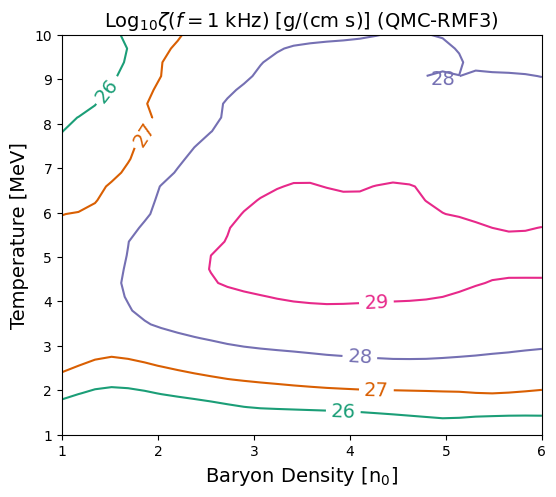

In [ ]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([26,27,28,29,30,31,32,33,34]), cmap='Dark2')#nipy_spectral_r
#fill=plt.contourf(grid_x,grid_y,grid_z,10,levels=np.array([1,50]),cmap='Greys', alpha=0.2)
fmt = {}
strs = ['26','27','28','29','30','31','32','33','34']
for l, s in zip(contours.levels, strs):
    fmt[l] = s
plt.clabel(contours, contours.levels[::1],inline=1,fmt=fmt, fontsize=14)
#ax.clabel(contours, inline=True,     fontsize=12)
#ax.scatter(3.5, 5, marker='o', s=50, color='red')
ax.set_title('Log$_{10}\zeta(f=1$ kHz) [g/(cm s)] (QMC-RMF3)',fontsize=14)
ax.set_ylabel('Temperature [MeV]',fontsize=14)
ax.set_xlabel('Baryon Density [n$_0$]',fontsize=14)
plt.savefig("bv_QMCRMF3_gcms.pdf")
plt.show()

In [ ]:
tripl=[]

with open('bv_IUF_gcms.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        tripl.append([float(row[0]),float(row[1]),float(row[2])])
x, y, z = zip(*tripl)
z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):30j, min(y):max(y):30j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

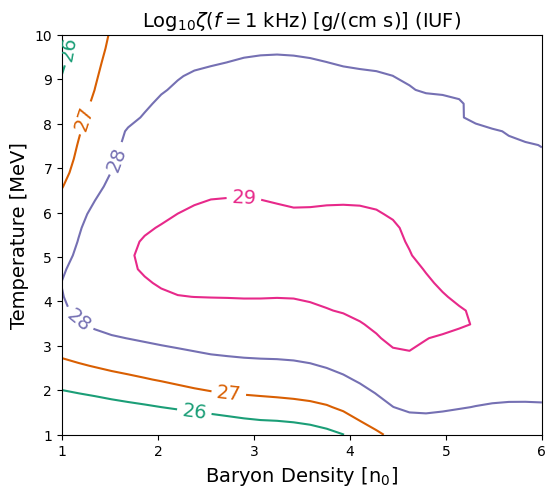

In [ ]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([26,27,28,29,30,31,32,33,34]), cmap='Dark2')#nipy_spectral_r
#fill=plt.contourf(grid_x,grid_y,grid_z,10,levels=np.array([1,50]),cmap='Greys', alpha=0.2)
fmt = {}
strs = ['26','27','28','29','30','31','32','33','34']
for l, s in zip(contours.levels, strs):
    fmt[l] = s
plt.clabel(contours, contours.levels[::1],inline=1,fmt=fmt, fontsize=14)
#ax.clabel(contours, inline=True,     fontsize=12)
#ax.scatter(3.5, 5, marker='o', s=50, color='red')
ax.set_title('Log$_{10}\zeta(f=1$ kHz) [g/(cm s)] (IUF)',fontsize=14)
ax.set_ylabel('Temperature [MeV]',fontsize=14)
ax.set_xlabel('Baryon Density [n$_0$]',fontsize=14)
plt.savefig("bv_IUF_gcms.pdf")
plt.show()

# Static Bulk Viscosity

In [ ]:
tripl=[]

with open('bv_static_QMCRMF3_gcms.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        tripl.append([float(row[0]),float(row[1]),float(row[2])])
x, y, z = zip(*tripl)
z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

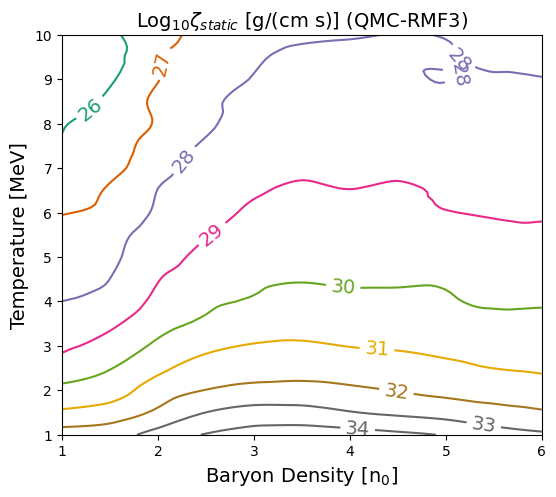

In [ ]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([26,27,28,29,30,31,32,33,34]), cmap='Dark2')#nipy_spectral_r
#contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([22,24,26,28,30]), cmap='Dark2')#nipy_spectral_r
#fill=plt.contourf(grid_x,grid_y,grid_z,10,levels=np.array([1,50]),cmap='Greys', alpha=0.2)
fmt = {}
strs = ['26','27','28','29','30','31','32','33','34']
#strs = ['22','24','26','28','30']
for l, s in zip(contours.levels, strs):
    fmt[l] = s
plt.clabel(contours, contours.levels[::1],inline=1,fmt=fmt, fontsize=14)
#ax.clabel(contours, inline=True,     fontsize=12)
#ax.scatter(3.5, 5, marker='o', s=50, color='red')
ax.set_title('Log$_{10}\zeta_{static}$ [g/(cm s)] (QMC-RMF3)',fontsize=14)
ax.set_ylabel('Temperature [MeV]',fontsize=14)
ax.set_xlabel('Baryon Density [n$_0$]',fontsize=14)
plt.savefig("bv_static_QMCRMF3_gcms.pdf")
plt.show()

In [ ]:
tripl=[]

with open('bv_static_IUF_gcms.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        tripl.append([float(row[0]),float(row[1]),float(row[2])])
x, y, z = zip(*tripl)
z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

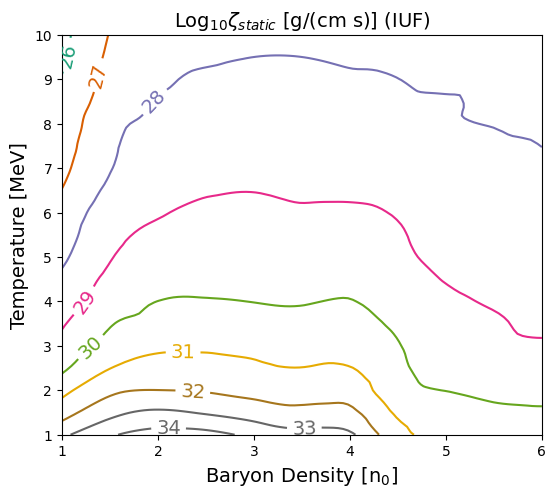

In [ ]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([26,27,28,29,30,31,32,33,34]), cmap='Dark2')#nipy_spectral_r
#contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([22,24,26,28,30]), cmap='Dark2')#nipy_spectral_r
#fill=plt.contourf(grid_x,grid_y,grid_z,10,levels=np.array([1,50]),cmap='Greys', alpha=0.2)
fmt = {}
strs = ['26','27','28','29','30','31','32','33','34']
#strs = ['22','24','26','28','30']
for l, s in zip(contours.levels, strs):
    fmt[l] = s
plt.clabel(contours, contours.levels[::1],inline=1,fmt=fmt, fontsize=14)
#ax.clabel(contours, inline=True,     fontsize=12)
#ax.scatter(3.5, 5, marker='o', s=50, color='red')
ax.set_title('Log$_{10}\zeta_{static}$ [g/(cm s)] (IUF)',fontsize=14)
ax.set_ylabel('Temperature [MeV]',fontsize=14)
ax.set_xlabel('Baryon Density [n$_0$]',fontsize=14)
plt.savefig("bv_static_IUF_gcms.pdf")
plt.show()

# Equilibrium Isospin Chemical Potential

In [ ]:
tripl=[]

with open('muI_QMCRMF3.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        tripl.append([float(row[0]),float(row[1]),float(row[2])])
x, y, z = zip(*tripl)
z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

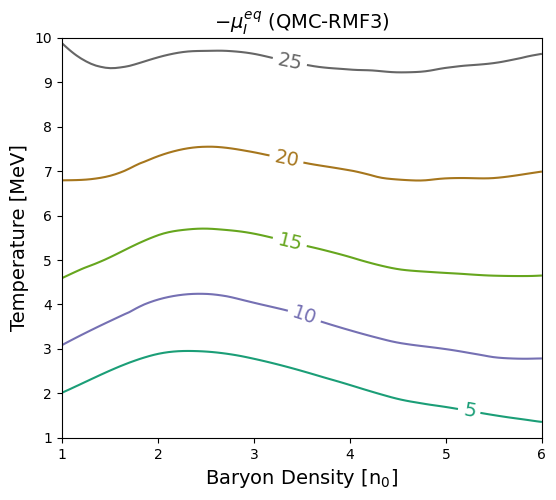

In [ ]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([5.0,10.0,15.0,20.0,25.0]), cmap='Dark2')#nipy_spectral_r
#fill=plt.contourf(grid_x,grid_y,grid_z,10,levels=np.array([1,50]),cmap='Greys', alpha=0.2)
fmt = {}
strs = ['$5$','10','15','20','25']
for l, s in zip(contours.levels, strs):
    fmt[l] = s
plt.clabel(contours, contours.levels[::1],inline=1,fmt=fmt, fontsize=14)
#ax.clabel(contours, inline=True,     fontsize=12)
ax.set_title('$-\mu_I^{eq}$ (QMC-RMF3)',fontsize=14)
ax.set_ylabel('Temperature [MeV]',fontsize=14)
ax.set_xlabel('Baryon Density [n$_0$]',fontsize=14)
plt.savefig("muI_QMCRMF3.pdf")
plt.show()

In [ ]:
tripl=[]

with open('muI_IUF.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        tripl.append([float(row[0]),float(row[1]),float(row[2])])
x, y, z = zip(*tripl)
z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

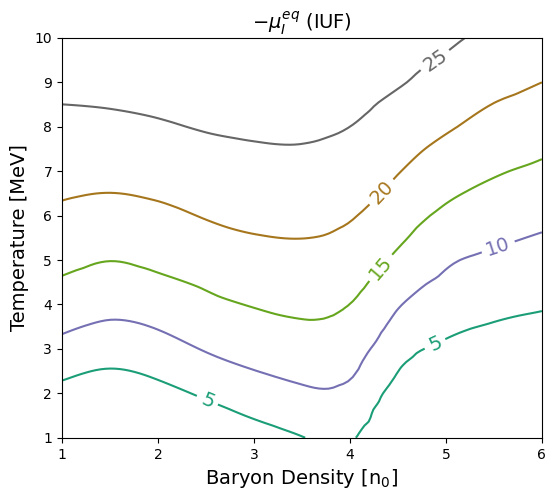

In [ ]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
contours = plt.contour(grid_x, grid_y, grid_z, levels=np.array([5.0,10.0,15.0,20.0,25.0]), cmap='Dark2')#nipy_spectral_r
#fill=plt.contourf(grid_x,grid_y,grid_z,10,levels=np.array([1,50]),cmap='Greys', alpha=0.2)
fmt = {}
strs = ['$5$','10','15','20','25']
for l, s in zip(contours.levels, strs):
    fmt[l] = s
plt.clabel(contours, contours.levels[::1],inline=1,fmt=fmt, fontsize=14)
#ax.clabel(contours, inline=True,     fontsize=12)
ax.set_title('$-\mu_I^{eq}$ (IUF)',fontsize=14)
ax.set_ylabel('Temperature [MeV]',fontsize=14)
ax.set_xlabel('Baryon Density [n$_0$]',fontsize=14)
plt.savefig("muI_IUF.pdf")
plt.show()